In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

In [2]:
customer_acquisition = pd.read_csv("C:\\Users\\kavit\\Desktop\\Laxman- Analytix labs\\Python\\Python Case Study\\Case Study-4\\Original file\\Customer Acqusition.csv")

repayment = pd.read_csv("C:\\Users\\kavit\\Desktop\\Laxman- Analytix labs\\Python\\Python Case Study\\Case Study-4\\Original file\\Repayment.csv")

spend = pd.read_csv("C:\\Users\\kavit\\Desktop\\Laxman- Analytix labs\\Python\\Python Case Study\\Case Study-4\\Original file\\spend.csv")

In [3]:
customer_acquisition.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [4]:
customer_acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        100 non-null    int64  
 1   Customer  100 non-null    object 
 2   Age       100 non-null    int64  
 3   City      100 non-null    object 
 4   Product   100 non-null    object 
 5   Limit     100 non-null    float64
 6   Company   100 non-null    object 
 7   Segment   100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [5]:
repayment.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [6]:
repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SL No:      1499 non-null   float64
 1   Customer    1500 non-null   object 
 2   Month       1500 non-null   object 
 3   Amount      1500 non-null   float64
 4   Unnamed: 4  0 non-null      float64
dtypes: float64(3), object(2)
memory usage: 59.6+ KB


In [7]:
repayment = repayment.drop(columns = 'Unnamed: 4')

In [8]:
repayment['Month'] = pd.to_datetime(repayment.Month, format = '%d-%b-%y')

In [9]:
repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   SL No:    1499 non-null   float64       
 1   Customer  1500 non-null   object        
 2   Month     1500 non-null   datetime64[ns]
 3   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 47.7+ KB


In [10]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [11]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl No:    1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Type      1500 non-null   object 
 4   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


In [12]:
spend['Month'] = pd.to_datetime(spend.Month, format = '%d-%b-%y')

In [13]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Sl No:    1500 non-null   int64         
 1   Customer  1500 non-null   object        
 2   Month     1500 non-null   datetime64[ns]
 3   Type      1500 non-null   object        
 4   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 58.7+ KB


### 1. In the above dataset,

#####  a. In case age is less than 18, replace it with mean of age values.

In [14]:
customer_acquisition['Age'] = np.where(customer_acquisition.Age < 18, customer_acquisition.Age.mean(), customer_acquisition.Age)

##### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card

In [15]:
customer_spend = customer_acquisition.merge(spend, how = 'left', on = 'Customer' )

In [16]:
customer_spend.drop(columns = ['No', 'Sl No:'], inplace = True)

In [17]:
customer_spend['Amount'] = np.where(customer_spend.Amount > customer_spend.Limit, 
                                    customer_spend.Limit * 50/100, customer_spend.Amount)

In [18]:
customer_spend

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,5000.00
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,5000.50
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,5001.00


##### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [19]:
customer_repayment = customer_acquisition.merge(repayment, how = 'left', on = 'Customer')

In [20]:
customer_repayment.drop(columns = ['No', 'SL No:'], inplace = True)

In [21]:
customer_repayment['Amount_repayment'] = np.where(customer_repayment.Amount > customer_repayment.Limit, 
                                                        customer_repayment.Limit, customer_repayment.Amount)

In [22]:
customer_repayment

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount,Amount_repayment
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88,165972.88
...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,310992.30,100000.00
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,121874.90,10000.00
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,337815.57,10001.00
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,25682.73,10002.00


### 2. From the above dataset create the following summaries:

##### a. How many distinct customers exist?


In [23]:
customer_spend.Customer.nunique()

100

#####  b. How many distinct categories exist?


In [24]:
customer_repayment.Product.nunique()

3

#####  c. What is the average monthly spend by customers?

In [25]:
customer_spend['spend_month'] = pd.DatetimeIndex(customer_spend.Month).strftime('%B')

In [26]:
customer_spend['spend_year'] = pd.DatetimeIndex(customer_spend.Month).strftime('%Y')

In [27]:
avg_monthly_spend = pd.DataFrame(customer_spend.groupby(['spend_year', 'spend_month'])['Amount'].mean())

In [28]:
avg_monthly_spend

Amount
spend_year spend_month               
2004       April        124621.976429
           February     136998.280000
           January      144233.915179
           March        133708.090714
           May          153326.954286
           November      79642.078571
           September    171579.263571
2005       April        146430.918929
           August       141707.435357
           December      84416.000000
           February     154334.423869
           January      192271.670714
           July         120803.091429
           June         190726.475714
           May          154625.803000
           November     178120.211667
           October       89879.421429
           September    109423.776429
2006       April        134743.702447
           August       213863.917857
           December     150129.360714
           February     148478.986905
           January      136312.515714
           July         189088.681071
           June         155971.498571
           March        131720.289032
           May          143693.687143
           November     144283.947143
           October      172156.287143
           September    142392.073571

##### d. What is the average monthly repayment by customers?


In [29]:
customer_repayment['repayment_month'] = pd.DatetimeIndex(customer_repayment.Month).strftime('%B')

In [30]:
customer_repayment['repayment_year'] = pd.DatetimeIndex(customer_repayment.Month).strftime('%Y')

In [31]:
avg_monthly_repayment = pd.DataFrame(customer_repayment.groupby(['repayment_year', 'repayment_month'])['Amount'].mean())

In [32]:
avg_monthly_repayment

Amount
repayment_year repayment_month               
2004           April            259141.679000
               February         256702.630741
               January          243489.649786
               March            252585.280667
               May              226162.720800
               November         209592.238000
               September        184487.848750
2005           April            212688.631333
               August           264430.921622
               December         320379.335833
               February         238829.265123
               January          240548.098148
               July             239871.479167
               June             210199.818333
               May              263207.367857
               November         256695.120000
               October          219849.956667
               September        247700.170000
2006           April            275472.251889
               August           224143.992500
               December         252736.569167
               February         284489.565128
               January          293475.389167
               July             257936.383243
               June             251990.453333
               March            240851.266814
               May              256920.884943
               November         199399.197407
               October          260765.480000
               September        262533.880833

##### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)
 

In [33]:
month_wise_spend = pd.DataFrame(customer_spend.groupby(['spend_year', 'spend_month'])['Amount'].sum().reset_index())

In [34]:
month_wise_repayment = pd.DataFrame(customer_repayment.groupby(['repayment_year', 
                                                                'repayment_month'])['Amount'].sum().reset_index())

In [35]:
month_wise_spend_repayment = month_wise_spend.merge(month_wise_repayment, how = 'inner', left_on = ['spend_year', 'spend_month'], 
                                                    right_on = ['repayment_year', 'repayment_month'], suffixes = ['_spend', '_repayment'])

In [36]:
month_wise_spend_repayment.drop(columns = ['repayment_year', 'repayment_month'], inplace = True)

In [37]:
month_wise_spend_repayment['monthly_profit'] = month_wise_spend_repayment.Amount_repayment - month_wise_spend_repayment.Amount_spend

In [38]:
month_wise_spend_repayment['profit'] = month_wise_spend_repayment.monthly_profit[month_wise_spend_repayment.monthly_profit > 0] * 2.9/100

In [39]:
month_wise_profit = month_wise_spend_repayment.loc[ : : , ['spend_year', 'spend_month', 
                                                           'profit']].set_index(['spend_year', 'spend_month'])

In [40]:
month_wise_profit

profit
spend_year spend_month              
2004       April        124260.21587
           February      89755.55651
           January      693021.40942
           March         55589.11226
           May          101717.22914
           November      58837.93963
           September     15941.18081
2005       April         66137.20309
           August       168667.94139
           December      77219.11287
           February     370102.57446
           January       32224.56423
           July          34429.21963
           June                  NaN
           May          547703.34467
           November      95704.23835
           October       40016.73982
           September     41773.60593
2006       April        351671.24456
           August                NaN
           December      26999.80562
           February     140910.29211
           January       46786.55405
           July         123225.73019
           June          24368.24934
           March        595960.31559
           May          414852.84479
           November      38971.00649
           October       20850.93446
           September     33550.60866

#####  f. What are the top 5 product types? 

In [41]:
product_type_wise_spend = customer_spend.groupby('Type')['Amount'].sum().reset_index()

In [42]:
product_type_wise_spend.sort_values(by = 'Amount', ascending = False, ignore_index = True).head(5)

,Type,Amount
0,PETRO,28597384.98
1,CAMERA,27690738.44
2,FOOD,20519243.60
3,AIR TICKET,20155847.12
4,TRAIN TICKET,19995825.72


In [43]:
print('Top 5 product types are', list((product_type_wise_spend.sort_values(by = 'Amount', ascending = False, ignore_index = True).head(5)).Type))

Top 5 product types are ['PETRO', 'CAMERA', 'FOOD', 'AIR TICKET', 'TRAIN TICKET']


##### g. Which city is having maximum spend?


In [44]:
city_wise_spend = customer_spend.groupby('City')['Amount'].sum().reset_index()

In [45]:
city_wise_spend.sort_values(by = 'Amount', ascending = False, ignore_index = True).head(1)

,City,Amount
0,COCHIN,45963513.5


In [46]:
print('City having maximum spend is COCHIN.')

City having maximum spend is COCHIN.


##### h. Which age group is spending more money?


In [47]:
customer_spend['Age_groups'] = pd.cut(customer_spend.Age, bins = [18, 30, 45, 60, 80], 
                                                labels = ['Group1', 'Group2', 'Group3', 'Group4'])

In [48]:
age_group_wise_spend = customer_spend.groupby('Age_groups')['Amount'].sum().reset_index()

In [49]:
age_group_wise_spend.sort_values(by = 'Amount', ascending = False, ignore_index = True).head(1)

,Age_groups,Amount
0,Group3,68690512.18


In [50]:
print('Age group spending more money is Group3(45-60 years).')

Age group spending more money is Group3(45-60 years).


##### i. Who are the top 10 customers in terms of repayment? 

In [51]:
customer_wise_repayment = customer_repayment.groupby('Customer')['Amount'].sum().reset_index()

In [52]:
customer_wise_repayment.sort_values(by = 'Amount', ascending = False, ignore_index = True).head(10)

,Customer,Amount
0,A61,10539142.91
1,A60,9876290.74
2,A13,9572000.66
3,A22,9372561.68
4,A21,9056336.15
5,A43,8489871.46
6,A45,8448334.87
7,A12,8334760.16
8,A48,8292416.75
9,A14,7943268.63


In [53]:
print('Top 10 customers in terms of repayment are', list(customer_wise_repayment.sort_values(by = 'Amount', ascending = False, ignore_index = True).head(10).set_index('Customer').index))

Top 10 customers in terms of repayment are ['A61', 'A60', 'A13', 'A22', 'A21', 'A43', 'A45', 'A12', 'A48', 'A14']


### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [54]:
city_wise_yearly_product_spend = pd.crosstab(index = [customer_spend.City, customer_spend.spend_year], 
                                             columns = customer_spend.Product, values = customer_spend.Amount, 
                                             aggfunc = 'sum')

In [55]:
city_wise_yearly_product_spend

Product                       Gold    Platimum      Silver
City       spend_year                                     
BANGALORE  2004         9289878.54  1112732.30  1291852.58
           2005        12892362.99   912284.97   830612.34
           2006        12030611.09   685831.27  1415480.94
BOMBAY     2004         6987853.53   897264.94   532089.03
           2005         8983018.28   711804.94   508988.54
           2006         7917144.31   972130.01  1092833.80
CALCUTTA   2004         7477140.98  2037690.30   500006.00
           2005        10303355.80  4434696.31   440147.06
           2006        11167532.77  3589606.66  1157956.42
CHENNAI    2004         1059618.50  3535652.38   282056.86
           2005         3740945.58  5053956.32   377184.49
           2006         2704288.62  5024923.40   350009.50
COCHIN     2004         7315850.15  3419904.07   814229.62
           2005        12110613.03  4960921.71   652269.38
           2006        10499142.38  4920592.29  1269990.87
DELHI      2004         2806495.00   283512.89   768172.30
           2005         1964845.27   494157.86   612311.21
           2006         2957103.32   176788.72   854899.97
PATNA      2004         2072567.90  1113069.60   756684.10
           2005         3252615.77  2883231.07   950094.19
           2006         2276181.69  1256137.65   700005.00
TRIVANDRUM 2004         2415102.84  2161676.67   209667.48
           2005         1240375.85  3601443.30   269912.99
           2006         2735710.87  2147403.75   555862.12

<AxesSubplot:title={'center':'City-Wise yearly spend on each product'}, xlabel='City', ylabel='Amount spend(in crores)'>

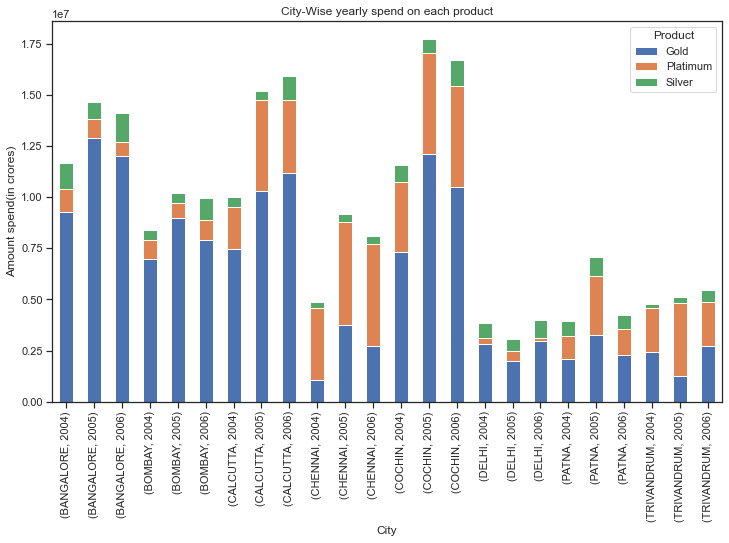

In [56]:
city_wise_yearly_product_spend.plot(kind = 'bar', stacked = True, figsize = (12, 7), 
                                    title = 'City-Wise yearly spend on each product', xlabel = 'City', 
                                    ylabel = 'Amount spend(in crores)')

### 4. Create graphs for 

##### a. Monthly comparison of total spends, city wise
 

In [57]:
city_wise_monthly_spend = pd.crosstab(index = customer_spend.City, 
                                      columns = customer_spend.spend_month,
                                      values = customer_spend.Amount, aggfunc = 'sum')

In [58]:
city_wise_monthly_spend

spend_month,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,4207980.48,695061.95,422167.24,6734494.76,9041796.84,2228217.69,1330685.90,5362903.07,6383115.13,2260603.07,1091602.61,703018.28
BOMBAY,1873785.01,1066744.75,140040.71,4276988.30,5948993.33,177726.32,1172594.97,5227850.50,3891945.60,2872049.40,676005.70,1278402.79
CALCUTTA,3457507.95,1548354.02,55001.50,8150545.61,9064864.90,2234573.27,2293045.81,4939040.04,5578246.87,2078880.93,196357.83,1511713.57
CHENNAI,2518656.99,305875.97,223628.27,4385815.95,4466961.36,693825.77,1244242.16,3183643.71,2856199.62,1347779.28,156247.17,745759.40
COCHIN,3882744.94,2317306.61,909533.05,5747886.38,11714373.54,1290897.30,2495745.07,5645146.53,6581085.69,3127999.60,868551.89,1382242.90
DELHI,777240.75,155402.16,842342.02,1494064.06,2714261.45,50001.50,511276.09,2267149.02,1600322.07,391610.96,64615.46,50001.00
PATNA,2338179.53,419383.64,50000.00,2353333.55,4916205.55,50000.00,746186.13,1437166.61,2136586.80,413677.87,329537.34,70329.95
TRIVANDRUM,1199293.45,453773.94,640922.26,2857123.89,3704336.99,260484.50,400336.83,2392316.51,2813534.48,143387.40,285581.92,186063.70


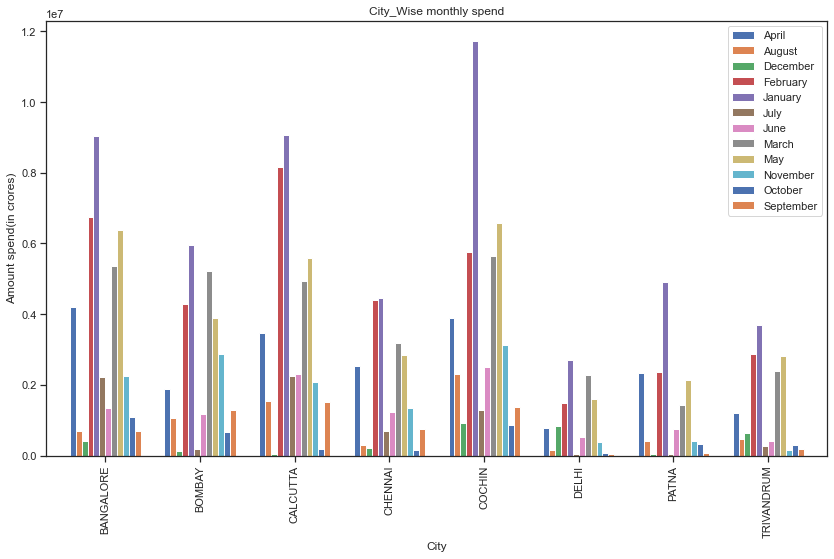

In [59]:
city_wise_monthly_spend.plot(kind = 'bar', figsize = (14, 8), width = 0.75, title = 'City_Wise monthly spend', 
                             ylabel = 'Amount spend(in crores)')

plt.legend(bbox_to_anchor = (1, 1))

##### b. Comparison of yearly spend on air tickets

In [60]:
yearly_spend_on_air_tickets = pd.DataFrame(pd.crosstab(index = customer_spend.Type, columns = customer_spend.spend_year, 
           values = customer_spend.Amount, aggfunc = 'sum').loc['AIR TICKET'])

In [61]:
yearly_spend_on_air_tickets

,AIR TICKET
spend_year,
2004,4357225.35
2005,10550152.21
2006,5248469.56


<AxesSubplot:title={'center':'Year-Wise spend on Air Tickets'}, xlabel='Year', ylabel='Amount spend(in crores)'>

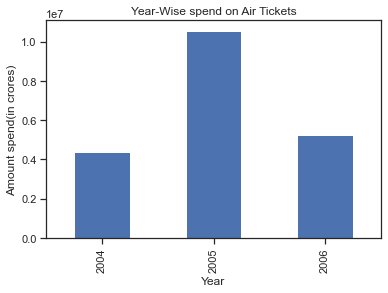

In [62]:
yearly_spend_on_air_tickets.plot(kind = 'bar', title = 'Year-Wise spend on Air Tickets', xlabel = 'Year', 
                                 ylabel = 'Amount spend(in crores)', legend = None)

##### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [63]:
product_wise_monthly_spend = pd.crosstab(index = customer_spend.Product, columns = customer_spend.spend_month, 
                                         values = customer_spend.Amount, aggfunc = 'sum')

In [64]:
product_wise_monthly_spend

spend_month,April,August,December,February,January,July,June,March,May,November,October,September
Product,,,,,,,,,,,,
Gold,13170572.59,4954030.42,2332940.96,24779179.55,32413831.83,5167416.37,6538862.64,19256972.48,21548169.76,9203267.46,3018223.38,3816887.62
Platimum,5182493.86,1714762.80,750156.19,9134054.58,14951578.51,1288156.26,2965712.71,7288837.68,8151926.49,2741618.42,550275.04,1667840.84
Silver,1902322.65,293109.82,200537.90,2087018.37,4206383.62,530153.72,689537.61,3909405.83,2140940.01,691102.63,100001.50,442803.13


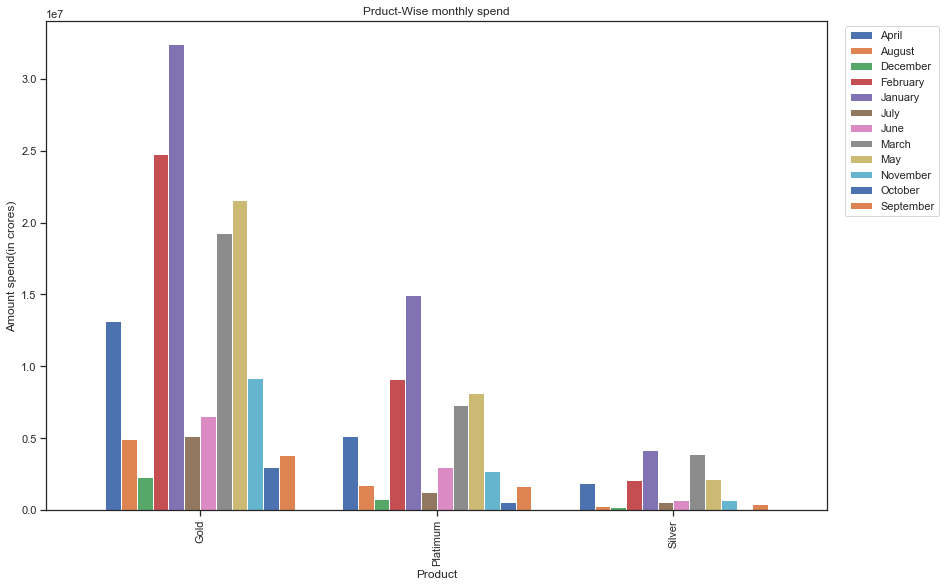

In [65]:
product_wise_monthly_spend.plot(kind = 'bar', figsize = (14, 9), width = 0.80, title = 'Prduct-Wise monthly spend', 
                                 ylabel = 'Amount spend(in crores)')

plt.legend(bbox_to_anchor = (1.15, 1))

In [66]:
print('Sales are high for all the products during the following months: \n'
    'January\n'
    'February\n'
    'March\n'
    'May')

Sales are high for all the products during the following months: 
January
February
March
May


### 5. Write user defined PYTHON function to perform the following analysis:


##### You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [67]:
customer_repayment.rename(columns = {'repayment_month' : 'monthly', 'repayment_year' : 'yearly'}, inplace = True)

In [68]:
def top10(x, y):
    prod_time_wise_repayment = customer_repayment[customer_repayment.Product == x].groupby(['City', 'Customer',  
                                                                              'Product', y])['Amount'].sum().reset_index()

    return pd.crosstab(index = [prod_time_wise_repayment.Product, prod_time_wise_repayment.City, 
                      prod_time_wise_repayment.Customer], columns = prod_time_wise_repayment[y], 
                      values = prod_time_wise_repayment.Amount, aggfunc = 'sum')

In [69]:
x = str(input())
y = str(input())

Silver
yearly


In [71]:
top10(x, y)

yearly                             2004        2005        2006
Product City       Customer                                    
Silver  BANGALORE  A18       1561795.61  1601675.83  2146497.59
                   A23       2168566.91  2631279.96  1895704.87
                   A59       1777966.35  1095123.37  1901929.43
                   A72        327006.94         NaN         NaN
                   A76              NaN   265619.05         NaN
                   A77              NaN         NaN     3159.62
        BOMBAY     A22       3455774.79  3395983.42  2520803.47
                   A75              NaN   481338.08         NaN
                   A80              NaN         NaN   481205.64
        CALCUTTA   A2         811338.80  1369616.44   638323.10
                   A58       1139773.34  1436192.25  1448994.16
                   A73              NaN   100712.38         NaN
                   A78              NaN         NaN    55344.81
                   A87              NaN         NaN   462283.02
        CHENNAI    A85              NaN         NaN   270527.39
                   A9        1200994.06  1330679.85  1355103.27
                   A96        310992.30         NaN         NaN
        COCHIN     A100        69551.19         NaN         NaN
                   A25       1873963.99  1544269.47  3231059.43
                   A7        1377007.07  1297840.74  1145636.21
                   A74              NaN   326559.01         NaN
                   A79              NaN         NaN   193230.31
        DELHI      A24        607204.99  3044224.68  2306847.95
                   A6        1670502.81   896864.62  1184096.28
        PATNA      A46       1872231.20  3415340.60  2573969.61
                   A8        2573830.15  1161759.35  1542689.34
                   A84              NaN         NaN   464121.13
        TRIVANDRUM A57       2732428.36   508271.11  1485721.26
                   A68        105098.26         NaN   319836.49
                   A86              NaN         NaN   295851.47